Расчет силы действующей на проводник со стороны переменного магнитного поля

А.Ю.Дроздов

In [1]:
from IPython.display import display, Math, Latex

In [2]:
mu = var('mu')
assume(mu, 'real')
assume(mu>0)

epsilon = var('epsilon')
assume(epsilon, 'real')
assume(epsilon>0)

s = var ('s')
assume(s, 'real')
assume(s>0)

kappa = var ('kappa')
assume(kappa, 'real')
assume(kappa>0)

k = var ('k')
assume(k, 'real')

a = var('a')
assume(a, 'real')
assume(a>0)

x = var('x')
y = var('y')
z = var('z')
t = var('t')

assume(x, 'real')
assume(y, 'real')
assume(z, 'real')
assume(t, 'real')

c = var('c')
assume(c, 'real')
assume(c>0)

omega_t = var('omega')
assume(omega, 'real')
assume(omega > 0)

omega_t = var('omega_t')
assume(omega_t, 'real')

sigma = var('sigma')
assume(sigma, 'real')
assume(sigma > 0)

H_0 = var('H_0')
assume(H_0, 'real')

In [3]:
# глубина проникновения магнитного поля в проводник
# Ландау Лифшиц. Электродинамика сплошных сред (59.4)
delta = c / sqrt(2*pi*sigma*omega)
display(Math(latex(delta)))

<IPython.core.display.Math object>

In [4]:
# магнитное поле в проводнике
# Ландау Лифшиц. Электродинамика сплошных сред (59.3)
H_y(x) = H_0 * exp(-x/delta) * exp(I*(x/delta - omega * t))
display(Math(latex(H_y(x))))
re_H_y(x) = H_y(x).real_part()
display(Math(latex(re_H_y(x))))

# Ландау Лифшиц. Электродинамика сплошных сред (59.6)
re_H_y(x) = H_0 * exp(-x/delta) * cos(x/delta - omega * t)
display(Math(latex(re_H_y(x))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# электрическое поле в проводнике
# Ландау Лифшиц. Электродинамика сплошных сред (59.5)
E_z(x) = H_y(x) * sqrt(omega/(8*pi*sigma)) * (1-I)
display(Math(latex(E_z(x))))
re_E_z(x) = E_z(x).real_part()
#display(Math(latex(re_E_z(x))))
display(Math(latex(re_E_z(x).factor())))

# Ландау Лифшиц. Электродинамика сплошных сред (59.6)
re_E_z(x) = H_0 * sqrt(omega/(4*pi*sigma)) * exp(-x/delta) * cos(x/delta - omega * t - pi/4)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
# ток проводимости вызванный электрическим полем
# Ландау Лифшиц. Электродинамика сплошных сред (58.4)
j_z(x) = sigma * re_E_z(x)
display(Math(latex(j_z(x))))

<IPython.core.display.Math object>

In [7]:
# сила действующая на ток проводимости со стороны магнитного поля
f_x(x) = 1 / c * j_z(x) * re_H_y(x)
print("f_x =", f_x(x))
display(Math(latex(f_x(x))))

f_x = 1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*cos(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c


<IPython.core.display.Math object>

In [8]:
# делаем замену переменной для удобства интегрирования по периоду колебаний
str_f_x = str(f_x(x))
print(str_f_x)
print("")
str_f_x = str_f_x.replace('omega*t', 'omega_t')
print(str_f_x)
print("")
exec(preparse("f_x_s(x) = " + str_f_x))
print(f_x_s(x))

1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*cos(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c

1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega_t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*cos(-omega_t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c

1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t)*cos(sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c


In [9]:
# усредняем по периоду колебаний
F_x(x) = (1/(2*pi))*integrate(f_x_s(x), (omega_t, 0, 2*pi))
display(Math(latex(F_x(x))))

<IPython.core.display.Math object>

In [10]:
# интегрируем по глубине
int_F_x(x) = integrate(F_x(x), x)

In [11]:
int_F_x(x)

-1/128*(8*pi*c*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/sqrt(pi*omega*sigma) + (sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*cos(-1/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/c + sqrt(2)*sqrt(pi*omega*sigma)*sin(-1/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/c)*c^2*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*omega*sigma) - (sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*cos(-17/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/c + sqrt(2)*sqrt(pi*omega*sigma)*sin(-17/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/c)*c^2*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*omega*sigma))*H_0^2*sigma*sqrt(omega/(pi*sigma))/(pi*c)

In [12]:
display(Math(latex(int_F_x(x))))

<IPython.core.display.Math object>

In [13]:
# силы действующей на проводник со стороны переменного магнитного поля
F(x) = -int_F_x(0)

In [14]:
display(Math(latex(F(x).full_simplify().expand())))

<IPython.core.display.Math object>

In [15]:
latex(F(x).full_simplify().expand())

\frac{H_{0}^{2}}{16 \, \pi}

In [16]:
F_simp = (F(x).full_simplify()/(-H_0^2/(16*pi))).expand()
F_simp

-1

In [17]:
display(Math(latex(F_simp)))

<IPython.core.display.Math object>

я получил результат в 2 раза меньший, чем ожидавшийся результат 
$$\frac{H_{0}^{2}}{8 \, \pi}$$
потому что additional 1/2 arises as result of integration on period

In [46]:
# электрическое поле в проводнике
# Ландау Лифшиц. Электродинамика сплошных сред (59.5)
E_z(x) = H_y(x) * sqrt(omega/(8*pi*sigma)) * (1-I)
display(Math(latex(E_z(x))))
re_E_z(x) = E_z(x).real_part()
#display(Math(latex(re_E_z(x))))
display(Math(latex(re_E_z(x).factor())))

# Ландау Лифшиц. Электродинамика сплошных сред (59.6)
re_E_z(x) = H_0 * sqrt(omega/(4*pi*sigma)) * exp(-x/delta) * cos(x/delta - omega * t - pi/4)

# а что если в данном расчете изменится сдвиг фаз между электрическим и магнитным полем?
phi = var("phi")
#left
re_E_z_l(x) = H_0 * sqrt(omega/(4*pi*sigma)) * exp(-x/delta) * cos(x/delta - omega * t - pi/4 + phi)
#right
re_E_z_r(x) = H_0 * sqrt(omega/(4*pi*sigma)) * exp(-x/delta) * cos(x/delta - omega * t - pi/4 + pi + phi)
display(Math(latex(re_E_z_l(x))))
display(Math(latex(re_E_z_r(x))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [19]:
# ток проводимости вызванный электрическим полем
# Ландау Лифшиц. Электродинамика сплошных сред (58.4)
j_z_l(x) = sigma * re_E_z_l(x)
j_z_r(x) = sigma * re_E_z_r(x)
show(j_z_l(x))
show(j_z_r(x))

1/2*H_0*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)*e^(-sqrt(2)*sqrt(pi*omega*sigma)*x/c)

1/2*H_0*sigma*sqrt(omega/(pi*sigma))*cos(3/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)*e^(-sqrt(2)*sqrt(pi*omega*sigma)*x/c)

In [20]:
# сила действующая на ток проводимости со стороны магнитного поля
f_x_l(x) = 1 / c * j_z_l(x) * re_H_y(x)
f_x_r(x) = 1 / c * j_z_r(x) * re_H_y(x)
#print("f_x =", f_x(x))
show(f_x_l(x))
show(f_x_r(x))

1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)*cos(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c

1/2*H_0^2*sigma*sqrt(omega/(pi*sigma))*cos(3/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi)*cos(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/c

In [21]:
# делаем замену переменной для удобства интегрирования по периоду колебаний
str_f_x_l = str(f_x_l(x))
str_f_x_r = str(f_x_r(x))
# print(str_f_x)
#print("")
str_f_x_l = str_f_x_l.replace('omega*t', 'omega_t')
str_f_x_r = str_f_x_r.replace('omega*t', 'omega_t')
#print(str_f_x)
#print("")
exec(preparse("f_x_s_l(x) = " + str_f_x_l))
exec(preparse("f_x_s_r(x) = " + str_f_x_r))
#print(f_x_s(x))

In [22]:
# усредняем по периоду колебаний
F_x_l(x) = (1/(2*pi))*integrate(f_x_s_l(x), (omega_t, 0, 2*pi))
F_x_r(x) = (1/(2*pi))*integrate(f_x_s_r(x), (omega_t, 0, 2*pi))

show(F_x_l(x))
show(F_x_r(x))

1/16*(4*pi*cos(-1/4*pi + phi) + sin(-1/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi) - sin(-17/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi))*H_0^2*sigma*sqrt(omega/(pi*sigma))*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*c)

1/16*(4*pi*cos(3/4*pi + phi) + sin(3/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi) - sin(-13/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c + phi))*H_0^2*sigma*sqrt(omega/(pi*sigma))*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*c)

In [23]:
# интегрируем по глубине
int_F_x_l(x) = integrate(F_x_l(x), x)
int_F_x_r(x) = integrate(F_x_r(x), x)

In [24]:
#int_F_x(x)

In [25]:
#display(Math(latex(int_F_x(x))))

In [26]:
# силы действующей на проводник со стороны переменного магнитного поля
F_l(x) = limit(int_F_x_l(x).expand(), x=Infinity)
F_r(x) = limit(int_F_x_r(x).expand(), x=Infinity)
show(F_l(x))
show(F_r(x))

0

0

In [27]:
# силы действующей на проводник со стороны переменного магнитного поля
F_l(x) = -int_F_x_l(0)
F_r(x) = -int_F_x_r(0)

In [28]:
show(F_l(x).full_simplify().expand())
show(F_r(x).full_simplify().expand())

1/16*H_0^2*cos(phi)/pi + 1/16*H_0^2*sin(phi)/pi

-1/16*H_0^2*cos(phi)/pi - 1/16*H_0^2*sin(phi)/pi

In [29]:
F_simp = (F(x).full_simplify()/(-H_0^2/(16*pi))).expand()
F_simp

-1

In [30]:
display(Math(latex(F_simp)))

<IPython.core.display.Math object>

я получил результат в 2 раза меньший, чем ожидавшийся результат 
$$\frac{H_{0}^{2}}{8 \, \pi}$$
потому что additional 1/2 arises as result of integration on period

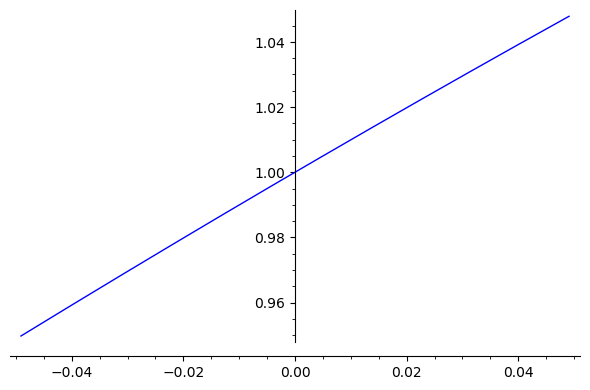

In [31]:
plot(cos(phi) + sin(phi), phi, -pi/64, pi/64)

Но есть вопрос

Исходя например из результатов опытов С.Б. Каравашкина по исследованию токов Фуко в разных материалах

https://sbkaravashkin.blogspot.com/2014/10/1.html

https://sbkaravashkin.blogspot.com/2014/10/2.html, изменится ли в данном расчете сдвиг фаз между электрическим и магнитным полем?

In [32]:
# Ниже численное моделирование на примере золота

Au_sigma_SI = 42.2 * 10^6 # Sm/m
Au_sigma_sgse = 9*10^9 * Au_sigma_SI
digit_values = [sigma == Au_sigma_sgse, c == 299792458 * 100 , epsilon == 1, mu == 1, H_0 == 1, omega == 2.98046134067856e15]
F_x_d(x) = F_x(x).subs(digit_values)
display(Math(latex(F_x_d(x))))

<IPython.core.display.Math object>

In [33]:
delta .subs(digit_values).n()

3.55477029224551e-7

In [34]:
# мкм
delta .subs(digit_values).n()*10*1000 

0.00355477029224551

In [35]:
int_F_x_d(x) = int_F_x(x).subs(digit_values)
display(Math(latex(int_F_x_d(x))))

<IPython.core.display.Math object>

plot(int_F_x_d(x), (x, 0, 0.000001))

In [36]:
int_F_x_d(0)

-0.0625000000000000/pi

In [37]:
int_F_x_d(0.01).n()

0

In [38]:
# Abraham force
# (epsilon * mu - 1) / (4 * pi * c) * ([E x H]).diff(t)
# (epsilon * mu - 1) / (4 * pi * c) * ([E.diff(t) x H] + [E x H.diff(t)])
# ([a x b])_x = a_y * b_z - a_z * b_y
# f_x = (epsilon * mu - 1) / (4 * pi * c) * (-E_z.diff(t) * H_y - E_z * H_y.diff(t))


# omega_t = - omega * t\n",


# f_x = (epsilon * mu - 1) / (4 * pi * c) *
#       integrate(
#         ( - Re(-I*omega * E_z * e^omega_t) * Re(H_y * e^omega_t)) +
#         ( - Re(E_z * e^omega_t) * Re(-I*omega * H_y * e^omega_t))
#       (omega_t, 0, 2*pi))\n",


# f_x = (epsilon * mu - 1) / (2 * 4 * pi * c) * (
#             ( - Re(-I*omega * E_z) * Re(H_y) - Im(-I*omega * E_z) * Im(H_y)) +
#             ( - Re(E_z) * Re(-I*omega * H_y) - Im(E_z) * Im(-I*omega * H_y))
#       )

In [39]:
f_abr_x = (epsilon * mu - 1) / (4 * pi * c) * (-E_z.diff(t) * H_y - E_z * H_y.diff(t))
show(f_abr_x(x))

(1/4*I + 1/4)*sqrt(1/2)*(epsilon*mu - 1)*H_0^2*omega*sqrt(omega/(pi*sigma))*e^(-2*I*omega*t + (2*I - 2)*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/(pi*c)

In [40]:
f_abr_x = (epsilon * mu - 1) / (4 * pi * c) * (-re_E_z.diff(t) * re_H_y - re_E_z * re_H_y.diff(t))
show(f_abr_x(x))

-1/8*(H_0^2*omega*sqrt(omega/(pi*sigma))*cos(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c) + H_0^2*omega*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c))*(epsilon*mu - 1)/(pi*c)

In [41]:
# делаем замену переменной для удобства интегрирования по периоду колебаний
str_f_x = str(f_abr_x(x))
print(str_f_x)
print("")
str_f_x = str_f_x.replace('omega*t', 'omega_t')
print(str_f_x)
print("")
exec(preparse("f_x_s(x) = " + str_f_x))
print(f_x_s(x))

-1/8*(H_0^2*omega*sqrt(omega/(pi*sigma))*cos(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c) + H_0^2*omega*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(-omega*t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c))*(epsilon*mu - 1)/(pi*c)

-1/8*(H_0^2*omega*sqrt(omega/(pi*sigma))*cos(-omega_t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(-1/4*pi - omega_t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c) + H_0^2*omega*sqrt(omega/(pi*sigma))*cos(-1/4*pi - omega_t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)*sin(-omega_t + sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c))*(epsilon*mu - 1)/(pi*c)

-1/8*(H_0^2*omega*sqrt(omega/(pi*sigma))*cos(sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c - omega_t)*e^(-2*s

In [42]:
# усредняем по периоду колебаний
f_abr_x(x) = (1/(2*pi))*integrate(f_x_s(x), (omega_t, 0, 2*pi))
display(Math(latex(f_abr_x(x))))

<IPython.core.display.Math object>

In [43]:
# интегрируем по глубине
int_f_abr_x(x) = integrate(f_abr_x(x), x)
show(int_f_abr_x(x))

1/256*((sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*sin(-1/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/c - sqrt(2)*sqrt(pi*omega*sigma)*cos(-1/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/c)*H_0^2*c^2*sqrt(omega/(pi*sigma))*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*sigma) - (sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*sin(-17/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/c - sqrt(2)*sqrt(pi*omega*sigma)*cos(-17/4*pi + 2*sqrt(2)*sqrt(pi)*sqrt(omega)*sqrt(sigma)*x/c)/c)*H_0^2*c^2*sqrt(omega/(pi*sigma))*e^(-2*sqrt(2)*sqrt(pi*omega*sigma)*x/c)/(pi*sigma))*(epsilon*mu - 1)/(pi^2*c)

In [44]:
# силы действующей на проводник со стороны переменного магнитного поля
f = limit(int_f_abr_x(x).expand(), x=Infinity)
show(f)

0

In [45]:
# силы действующей на проводник со стороны переменного магнитного поля
f_abr = -int_f_abr_x(0).expand().full_simplify()
show(f_abr)

0